## Assignment 1
### Name: Navaneeth Shaji
### Roll Number: 21CS30032

In [38]:
# import all the necessary libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
df = pd.read_csv('../../dataset/linear-regression.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# taking a column of 1's in order to represent the constant term in the loss function 
column_of_ones = np.ones((X.shape[0],1))

# normalising the data
st = StandardScaler() 
X_norm = st.fit_transform(X)
# adding the column of ones to the normalised dataset
X_norm = np.hstack((column_of_ones,X_norm))


In [40]:
# splitting the  dataset into training , validation and testing wihtout normalising the data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=104,train_size=0.8,shuffle=True)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,random_state=104,train_size=5/8,shuffle=True)

In [41]:
# function that the predicted y for the linear regression model 

def hypothesis_func(w,x) :
    return np.dot(w,x)


In [42]:
# Analytical solution using mean squared error loss function 


X_train_transpose = np.transpose(X_train)
y_train_transpose = np.transpose(y_train)

theta = np.matmul(X_train_transpose,X_train)
theta = np.linalg.inv(theta)
theta = np.matmul(theta , X_train_transpose)
theta = np.matmul(theta,y_train_transpose)
print("Theta =",theta)

Theta = [ 1.21762041e-02 -1.27511735e+00 -3.74713311e-01  7.66865125e-04
 -1.99780775e+00  3.03006732e-03 -1.98454143e-03  4.99004471e+00
 -6.50803240e-01  8.08006093e-01  3.02820901e-01]


In [43]:
# calculating the Root Mean Squared Error on the test set

m = X_test.shape[0] 

rmse = 0 
for i in range(m) : 
    rmse = rmse + np.square(hypothesis_func(theta ,X_test[i])-y_test[i])
rmse = rmse/m
rmse = np.sqrt(rmse)
print(rmse)

0.6065917865695509


In [44]:
# Calculating the R-score 
num = 0 
den = 0
m = X_test.shape[0]
mean = np.mean(y_test)
for i in range(m) :  
    num = num + np.square(hypothesis_func(theta,X_test[i])-y_test[i])
    den = den + np.square(y_test[i]-mean)
r_sqr = 1 - num/den 
print(r_sqr)

0.37534693574752964


In [45]:
# training the model using gradient descent

# training the model using gradient descent 
# using normalised data for this 
# splitting the  dataset into training , validation and testing 
X_train,X_test,y_train,y_test = train_test_split(X_norm,y,random_state=104,train_size=0.8)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,random_state=104,train_size=5/8)


In [46]:
def cost_func(x,y,theta) : 
    m = x.shape[0]
    
    cost = 0.0 
    for i in  range(m) : 
        cost = cost + np.square(np.dot(theta,x[i])-y[i])
    cost=cost / (2*m)
    return cost 

In [47]:
# def find_gradient(x,y,theta) : 
#     m  = x.shape[0]
#     n  = x.shape[1]
    
#     dl_d0 = np.zeros((n,))
    
#     for j in range(n) :
#         err_sum = 0 
#         for i in range(m) : 
#             err = np.dot(theta,x[i])-y[i]
#             err = err * x[i][j]
#             err_sum = err_sum + err 
#         dl_d0[j] = err_sum/m
    
#     return dl_d0
            
            
def find_gradient(x,y,theta) : 
    m = x.shape[0]
    n = x.shape[1]
    
    dl_d0=np.zeros((n,))
    theta_transpose = np.transpose(theta)
    
    for j in range(n) :
         err = np.matmul(x,theta_transpose)-y
         err = np.dot(err,x[:,j])
         dl_d0[j] = err/m
        
    return dl_d0
            

In [48]:
def gradient_descent(x_train,y_train,x_vali,y_vali,alpha,iterations,find_gradient,cost)  :
    m = x_train.shape[0]
    n = x_train.shape[1]
    
    costs_train = [] # to maintain the cost on training set after each iteration
    cost_validation = [] # to maintain the cost on validation set after each iteration
    #initial theta 
    theta = np.ones(n)
    for i in range(iterations) :
        gradient = find_gradient(x_train,y_train,theta)
        theta = theta - alpha*gradient
        train_cost = cost_func(x_train,y_train,theta)
        costs_train.append(train_cost)
        vali_cost = cost_func(x_vali,y_vali,theta)
        cost_validation.append(vali_cost)
        
    return theta , costs_train,cost_validation
        

alpha =  0.01


theta =  [ 5.61261762  0.1417225  -0.22366163 -0.08319497  0.04207518 -0.08708917
  0.02194309 -0.05544636 -0.10541968 -0.03672069  0.1546629   0.25687256]


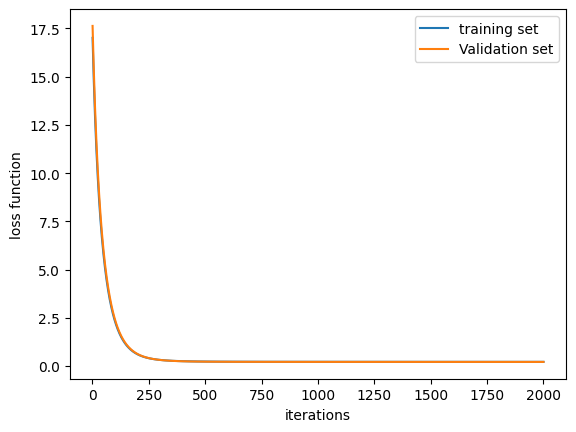

RMSE =  0.6047663583977808
R square =  0.3791008395236878




alpha =  0.001
theta =  [ 4.9563254   0.48079048  0.13233627  0.24701805 -0.02528752  0.07128736
  0.09960763  0.06190617 -0.06677567  0.57783945  0.18407771  0.47854503]


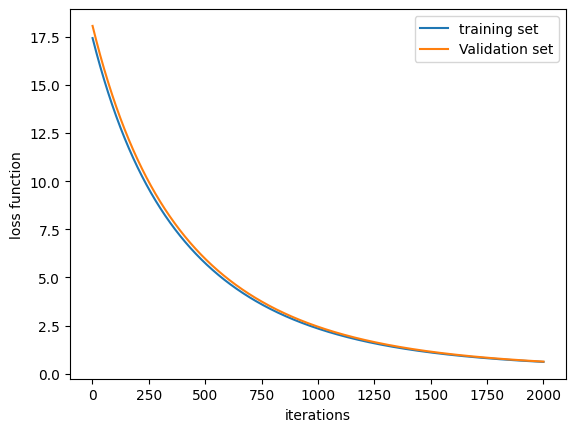

RMSE =  1.0877350069616392
R square =  -1.0085934184232417




alpha =  0.0001
theta =  [1.82118515 0.78530184 0.89813109 0.74040662 0.68410411 0.72360544
 0.73218664 0.70239543 0.65274364 1.0920734  0.73759658 0.99069068]


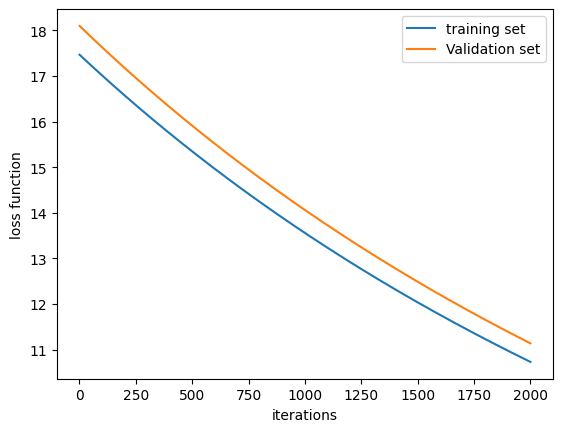

RMSE =  4.75662329864475
R square =  -37.409914571088954






In [49]:
alpha = [0.01, 0.001 ,0.0001 ] 
interations_no = 2000
iterations = [j for j in range(1,2001)]
for i in range(3) : 
    print("alpha = ",alpha[i])
    theta , cost_train,cost_validation = gradient_descent(X_train,y_train,X_validation,y_validation,alpha[i],interations_no,find_gradient,cost_func)
    print("theta = " , theta )
    
    # plotting the loss function on training set  with number of iterations
    cost_arr = np.array(cost_train)
    
    plt.plot(iterations,cost_arr,label="training set")
    plt.xlabel("iterations")
    plt.ylabel("loss function")
    
    cost_arr = np.array(cost_validation)
    plt.plot(iterations,cost_arr,label = "Validation set")
    plt.legend()
    plt.show()
    
    # calculating the Root Mean Squared Error on the test set
    m = X_test.shape[0] 

    rmse = 0 
    for i in range(m) : 
        rmse = rmse + np.square(hypothesis_func(theta ,X_test[i])-y_test[i])
    rmse = rmse/m
    rmse = np.sqrt(rmse)
    print("RMSE = " ,rmse)
    
    # Calculating the R-score 
    num = 0 
    den = 0
    m = X_test.shape[0]
    mean = np.mean(y_test)
    for i in range(m) :  
        num = num + np.square(hypothesis_func(theta,X_test[i])-y_test[i])
        den = den + np.square(y_test[i]-mean)
    r_sqr = 1 - num/den 
    print("R square = ",r_sqr)
    print("\n\n\n")
    

